In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew #for some statistics

%matplotlib inline
pd.set_option('max_colwidth',1000)
color = sns.color_palette()
sns.set_style('darkgrid')

In [2]:
# Load the loan data
df = pd.read_pickle('data_cleaned.pkl')
df.reset_index(drop=True, inplace=True)

# The following are not available during the loan process. So, dropping them.
to_drop_list = ('out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'last_pymnt_d_month', 'last_pymnt_d_year') 
for f in to_drop_list:
    print(f)
    df = df.drop(f, 1)

out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_amnt
last_pymnt_d_month
last_pymnt_d_year


In [3]:
# Encode the loan_status to numerical values
# Fully Paid = 1
# Charged Off = 0
df['loan_status'] = df['loan_status'].apply(lambda x: int(x == 'Fully Paid'))

In [4]:
# Categorical df from data-cleanup.ipynb
# Categorical df 
cat_features = df.select_dtypes(include=['object']).columns
print(cat_features)

# cat_features = ['grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 
                # 'purpose', 'addr_state', 'initial_list_status', 'application_type', 'disbursement_method']

for y in cat_features:
    # print(y + " has " + str(len(df[y].unique())) + " unique values")
    df = df.join(pd.get_dummies(df[y], prefix=y))
    df.drop(y, axis=1, inplace=True)

# Remove int_rate also
df.drop('int_rate', axis=1, inplace=True)

Index(['grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'purpose', 'addr_state', 'initial_list_status'],
      dtype='object')


In [5]:
# Renaming some column names
df.rename(columns = {'emp_length_<1':'emp_length_less_than_1'}, inplace = True)

df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,annual_inc,loan_status,zip_code,dti,delinq_2yrs,...,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w
count,769790.000000,769790.000000,769790.000000,769790.000000,769790.000000,7.697900e+05,769790.000000,769790.000000,769790.000000,769790.000000,...,769790.000000,769790.000000,769790.000000,769790.000000,769790.000000,769790.000000,769790.000000,769790.000000,769790.000000,769790.000000
mean,14291.547760,14278.200711,14246.739587,41.738750,435.899255,7.548923e+04,0.807545,519.343105,17.787344,0.306419,...,0.080280,0.007949,0.028986,0.001919,0.022378,0.012852,0.004078,0.002268,0.506499,0.493501
std,8486.335554,8479.674172,8484.451273,10.237035,255.080380,6.541486e+04,0.394229,314.145951,8.257461,0.855870,...,0.271727,0.088802,0.167767,0.043761,0.147908,0.112634,0.063727,0.047571,0.499958,0.499958
min,500.000000,500.000000,0.000000,36.000000,14.010000,3.000000e+03,0.000000,7.000000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8000.000000,8000.000000,7975.000000,36.000000,251.110000,4.567625e+04,1.000000,234.000000,11.610000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12000.000000,12000.000000,12000.000000,36.000000,376.440000,6.500000e+04,1.000000,481.000000,17.300000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,20000.000000,20000.000000,20000.000000,36.000000,574.880000,9.000000e+04,1.000000,826.000000,23.560000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,40000.000000,40000.000000,40000.000000,60.000000,1714.540000,9.550000e+06,1.000000,999.000000,49.950000,39.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
from sklearn.utils import shuffle
df = shuffle(df)

In [7]:
# Correlation Analysis
# most correlated features
corrmat = df.corr()
# top_corr_features = corrmat.index[abs(corrmat["int_rate"])>0.5]
# plt.figure(figsize=(100,100))
# g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
# sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")

def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest")
    ax1.grid(True)
    plt.title('Feature Correlation')
    # labels=['Sex','Length','Diam','Height','Whole','Shucked','Viscera','Shell','Rings',]
    # ax1.set_xticklabels(labels,fontsize=6)
    # ax1.set_yticklabels(labels,fontsize=6)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax) # , ticks=[.75,.8,.85,.90,.95,1])
    plt.figure(figsize=(100,100))
    plt.show()

# correlation_matrix(df)

In [8]:
corrmat['loan_status']

loan_amnt                     -0.062782
funded_amnt                   -0.062842
funded_amnt_inv               -0.062542
term                          -0.177213
installment                   -0.044686
annual_inc                     0.046263
loan_status                    1.000000
zip_code                       0.014210
dti                           -0.125913
delinq_2yrs                   -0.020983
inq_last_6mths                -0.058257
mths_since_last_delinq        -0.005249
mths_since_last_record        -0.025147
open_acc                      -0.032096
pub_rec                       -0.024851
revol_bal                      0.014671
revol_util                    -0.072315
total_acc                      0.014078
collections_12_mths_ex_med    -0.018630
mths_since_last_major_derog    0.023427
acc_now_delinq                -0.007336
tot_coll_amt                  -0.000049
tot_cur_bal                    0.062382
open_acc_6m                   -0.035170
open_act_il                   -0.022449


In [9]:
# top_corr_features = corrmat.loc[abs(corrmat['loan_status']) > 0.1]
# plt.figure(figsize=(10,10))
# sns.heatmap(df[top_corr_features].corr(), annot=True, cmap='RdYlGn')
# sns.heatmap(top_corr_features.corr(), annot=True, cmap='RdYlGn')

In [10]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(type(get_top_abs_correlations(df, 3)))
print(get_top_abs_correlations(df, 50))

Top Absolute Correlations
<class 'pandas.core.series.Series'>
initial_list_status_f     initial_list_status_w             1.000000
loan_amnt                 funded_amnt                       0.999267
funded_amnt               funded_amnt_inv                   0.998571
loan_amnt                 funded_amnt_inv                   0.997695
num_actv_rev_tl           num_rev_tl_bal_gt_0               0.986893
tot_cur_bal               tot_hi_cred_lim                   0.980978
funded_amnt               installment                       0.954760
loan_amnt                 installment                       0.953663
funded_amnt_inv           installment                       0.953258
il_util                   all_util                          0.901608
open_acc                  num_sats                          0.897047
num_bc_tl                 num_rev_accts                     0.871491
open_rv_12m               open_rv_24m                       0.870701
total_bal_ex_mort         total_il_high_c

In [11]:
# https://www.kaggle.com/vjgupta/reach-top-10-with-simple-model-on-housing-prices
    
# c = df.corr().abs()
# s = c.unstack()
# so = s.sort_values(ascending=False).drop_duplicates()

# with pd.option_context('display.max_rows', 1000, 'display.max_columns', 3):
  # print(so)

/home/anilraj/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


mu = 0.81 and sigma = 0.39


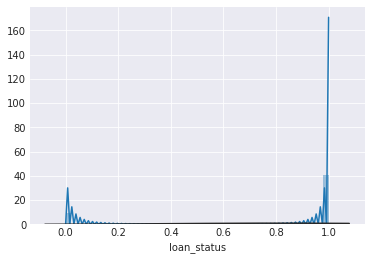

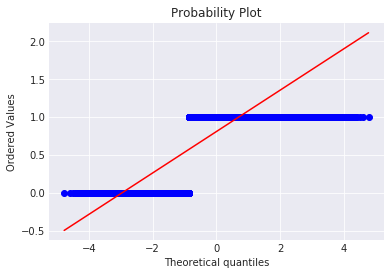

In [12]:
# Target Variable 
def check_skewness(col):
    sns.distplot(df[col], fit=norm)
    fig = plt.figure()
    res = stats.probplot(df[col], plot=plt)
    (mu, sigma) = norm.fit(df[col])
    print('mu = {:.2f} and sigma = {:.2f}'.format(mu, sigma))

check_skewness('loan_status')

In [13]:
# Highly skewed features

skewed_features = df.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew': skewed_features})
skewness

,Skew
tot_coll_amt,838.109658
addr_state_IA,392.370998
delinq_amnt,74.964306
total_rev_hi_lim,59.534298
purpose_educational,51.851459
num_tl_120dpd_2m,49.292749
annual_inc,44.084050
tax_liens,41.219025
addr_state_ID,39.679203
addr_state_ND,36.838210


In [14]:
skewness = skewness[abs(skewness) > 0.75]
print('There are {} skewed features to Box Cox transform'.format(skewness.shape[0]))

There are 208 skewed features to Box Cox transform


In [15]:
from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    df[feat] = boxcox1p(df[feat], lam)

In [16]:
df = pd.get_dummies(df)
print(df.shape)
df

(769790, 208)


,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,annual_inc,loan_status,zip_code,dti,delinq_2yrs,...,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w
321150,22.782058,22.782058,22.782058,4.792130,10.850738,31.765210,0.000000,10.779829,4.033107,0.730463,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.730463
705691,18.491718,18.491718,18.491718,4.792130,8.243621,24.470542,0.730463,6.881187,2.625605,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.730463,0.000000
377068,24.306440,24.306440,24.306440,5.684507,11.237275,29.167258,0.000000,10.034756,3.782840,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.730463,0.000000
85052,19.000645,19.000645,19.000645,4.792130,8.967806,28.476974,0.000000,11.640795,3.901909,1.540963,...,0.000000,0.730463,0.000000,0.0,0.000000,0.0,0.0,0.0,0.730463,0.000000
386388,20.610004,20.610004,20.610004,4.792130,9.571590,28.869811,0.000000,11.234013,3.800769,1.820334,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.730463
744945,19.874209,19.874209,19.874209,5.684507,8.520744,29.020291,0.730463,12.074291,3.014966,0.000000,...,0.000000,0.000000,0.000000,0.0,0.730463,0.0,0.0,0.0,0.000000,0.730463
752311,19.458096,19.458096,19.458096,4.792130,9.050880,29.919958,0.730463,6.899104,4.240562,0.730463,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.730463
346005,23.598505,23.598505,23.598505,5.684507,10.456122,30.296202,0.000000,5.684507,2.465680,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.730463
175060,19.403352,19.403352,19.403352,4.792130,9.022056,23.964056,0.730463,8.889640,4.319412,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.730463,0.000000
194471,25.360669,25.360669,25.326250,4.792130,12.600135,30.737918,0.730463,11.332597,4.155134,0.000000,...,0.730463,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.730463,0.000000


/home/anilraj/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


mu = 0.59 and sigma = 0.29


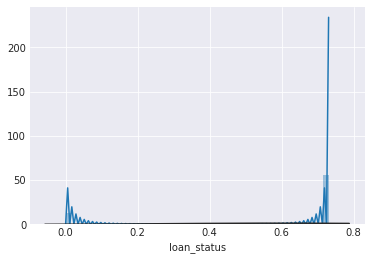

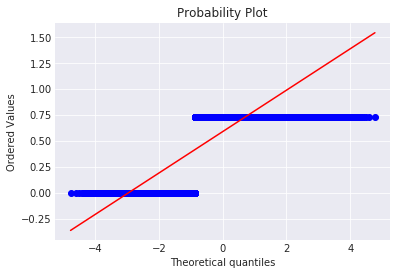

In [17]:
# Produce a scatter matrix for each pair of features in the data
# pd.scatter_matrix(df, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

# Check skew again
check_skewness('loan_status')

In [18]:
# Running corr() function to see how the features are correlated.
df.corr()

,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,annual_inc,loan_status,zip_code,dti,delinq_2yrs,...,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w
loan_amnt,1.000000,0.999485,0.991096,0.390193,0.974018,0.477400,-0.066544,-0.009669,0.056308,0.003837,...,0.026023,0.000512,0.012829,-0.005485,0.002654,-0.007797,-0.002169,0.003321,-0.070802,0.070802
funded_amnt,0.999485,1.000000,0.992095,0.389246,0.974854,0.477231,-0.066608,-0.009558,0.056982,0.004144,...,0.026057,0.000545,0.012826,-0.005447,0.002737,-0.007744,-0.002122,0.003354,-0.072154,0.072154
funded_amnt_inv,0.991096,0.992095,1.000000,0.387604,0.966986,0.473318,-0.065480,-0.008968,0.060703,0.004916,...,0.025973,0.000436,0.012302,-0.005353,0.002655,-0.007568,-0.001838,0.003491,-0.077645,0.077645
term,0.390193,0.389246,0.387604,1.000000,0.202143,0.119207,-0.177213,-0.014858,0.077999,-0.003978,...,-0.005291,0.006614,0.011938,-0.001682,-0.002079,-0.001286,0.007475,0.001953,-0.104144,0.104144
installment,0.974018,0.974854,0.966986,0.202143,1.000000,0.463165,-0.054160,-0.006072,0.059020,0.012874,...,0.028221,-0.001156,0.010473,-0.005761,0.003707,-0.008420,-0.004346,0.003110,-0.037874,0.037874
annual_inc,0.477400,0.477231,0.473318,0.119207,0.463165,1.000000,0.073179,-0.018996,-0.206780,0.082058,...,0.042691,-0.005789,0.026027,-0.011048,0.001977,-0.022968,-0.013172,-0.002067,-0.072128,0.072128
loan_status,-0.066544,-0.066608,-0.065480,-0.177213,-0.054160,0.073179,1.000000,0.007509,-0.112951,-0.021707,...,0.003644,0.004847,0.000103,0.005290,0.014353,0.007166,0.001971,0.002565,0.016898,-0.016898
zip_code,-0.009669,-0.009558,-0.008968,-0.014858,-0.006072,-0.018996,0.007509,1.000000,0.030912,-0.026868,...,0.230466,0.080285,-0.114895,-0.088853,0.166892,0.037495,-0.033409,0.041353,-0.004527,0.004527
dti,0.056308,0.056982,0.060703,0.077999,0.059020,-0.206780,-0.112951,0.030912,1.000000,-0.003484,...,0.033514,0.008002,0.002882,0.009687,-0.003084,0.009850,0.014000,0.009947,-0.033031,0.033031
delinq_2yrs,0.003837,0.004144,0.004916,-0.003978,0.012874,0.082058,-0.021707,-0.026868,-0.003484,1.000000,...,0.001988,-0.002704,0.003085,0.002054,-0.008026,-0.003746,0.000627,-0.000282,-0.018312,0.018312


In [19]:
# Histogram
# for y in df.columns:
    # plt.figure()
    # df[y].plot.hist(bins=20, title=y)
    # plt.show()

In [20]:
# Split the data in features and target label
loan_status_raw = df['loan_status']
loan_status = loan_status_raw.apply(lambda x: int(x > 0.1))
features = df.drop('loan_status', axis=1)

from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold, cross_val_score

# Split the features and loan_status data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, loan_status, test_size = 0.2, random_state = 0)

print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    print(learner)
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size'
    start = time() # Get start time
    learner.fit(X_train, y_train)
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set,
    #       then get predictions
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train)
    end = time() # Get end time
       
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy
    results['acc_train'] = accuracy_score(y_train, learner.predict(X_train))
        
    # TODO: Compute accuracy on test set
    results['acc_test'] = accuracy_score(y_test, learner.predict(X_test))
    
    # TODO: Compute F-score
    results['f_train'] = fbeta_score(y_train, learner.predict(X_train), beta=0.5)
        
    # TODO: Compute F-score on the test set
    results['f_test'] = fbeta_score(y_test, learner.predict(X_test), beta=0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

"""
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
result = train_predict(clf, len(y_train), X_train, y_train, X_test, y_test)
print(result)

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
result = train_predict(clf, len(y_train), X_train, y_train, X_test, y_test)
print(result)

k_fold = KFold(len(loan_status), n_folds=5, shuffle=True, random_state=0)
clf = GaussianNB()
print(cross_val_score(clf, features, loan_status, cv=k_fold))
    

k_fold = KFold(len(loan_status), n_folds=5, shuffle=True, random_state=0)
clf = DecisionTreeClassifier()
print(cross_val_score(clf, features, loan_status, cv=k_fold))
"""

/home/anilraj/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Training set has 615832 samples.
Testing set has 153958 samples.


'\nfrom sklearn.naive_bayes import GaussianNB\nclf = GaussianNB()\nresult = train_predict(clf, len(y_train), X_train, y_train, X_test, y_test)\nprint(result)\n\nfrom sklearn.tree import DecisionTreeClassifier\nclf = DecisionTreeClassifier()\nresult = train_predict(clf, len(y_train), X_train, y_train, X_test, y_test)\nprint(result)\n\nk_fold = KFold(len(loan_status), n_folds=5, shuffle=True, random_state=0)\nclf = GaussianNB()\nprint(cross_val_score(clf, features, loan_status, cv=k_fold))\n    \n\nk_fold = KFold(len(loan_status), n_folds=5, shuffle=True, random_state=0)\nclf = DecisionTreeClassifier()\nprint(cross_val_score(clf, features, loan_status, cv=k_fold))\n'

In [21]:
"""
print("-- Applying more strict rule to find outliers -- ")
for feature in df.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(df[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(df[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 3*(Q3-Q1)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(df[~((df[feature] >= Q1 - step) & (df[feature] <= Q3 + step))])
"""

'\nprint("-- Applying more strict rule to find outliers -- ")\nfor feature in df.keys():\n    \n    # TODO: Calculate Q1 (25th percentile of the data) for the given feature\n    Q1 = np.percentile(df[feature], 25)\n    \n    # TODO: Calculate Q3 (75th percentile of the data) for the given feature\n    Q3 = np.percentile(df[feature], 75)\n    \n    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)\n    step = 3*(Q3-Q1)\n    \n    # Display the outliers\n    print("Data points considered outliers for the feature \'{}\':".format(feature))\n    display(df[~((df[feature] >= Q1 - step) & (df[feature] <= Q3 + step))])\n'

In [22]:
## https://github.com/anilrajgr/udacity-machine-learning/blob/master/projects/customer_segments/customer_segments.ipynb
# Apply PCA by fitting the data with the same number of dimensions as features
from sklearn import decomposition

# from vpython import *

pca = decomposition.PCA(n_components=10)
pca.fit(features)
df_pca = pca.transform(features)

# Generate PCA results plot
# pca_results = vs.pca_results(features, pca)

# print(pca_results['Explained Variance'].cumsum())

In [23]:
print(pca.explained_variance_ratio_)
print(np.cumsum(pca.explained_variance_ratio_))
print(pca.singular_values_)

[0.5067649  0.16131948 0.08431858 0.05719553 0.03294425 0.02574678
 0.01914838 0.01610658 0.01451966 0.01122624]
[0.5067649  0.66808438 0.75240296 0.80959849 0.84254274 0.86828952
 0.8874379  0.90354448 0.91806414 0.92929037]
[18637.39072587 10515.38679082  7602.27333931  6261.27651078
  4751.94752026  4200.90954065  3622.82891913  3322.64167141
  3154.71460775  2773.95184308]


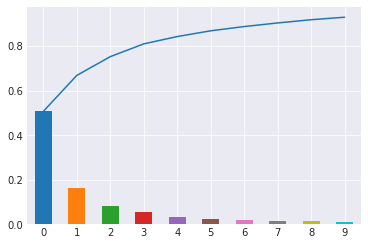

In [24]:
pd.Series(pca.explained_variance_ratio_).plot.bar()
pd.Series(np.cumsum(pca.explained_variance_ratio_)).plot()

In [25]:
df_pca

array([[ 12.46983991,  -6.55456452,  -8.72809831, ...,  -2.73953901,
         -2.65822229,  -0.67899332],
       [-65.27065182,   6.3824733 ,  -7.30861801, ...,  -3.62688931,
          0.63313722,   2.16293799],
       [ 16.04387375,  -8.36548683,  -6.24562892, ...,   1.49698974,
         -1.29312465,  -3.83380301],
       ...,
       [ 10.84425189,  24.1418814 ,   4.77704498, ...,  -0.56878723,
          2.69335028,  -1.51163186],
       [ 48.0798472 ,  23.83093534,   2.74081456, ...,   2.37630422,
         -2.50334283,   6.86678563],
       [-11.94604686,  -4.1518861 ,   1.94048067, ...,  -2.74786595,
          5.24968345,  -4.20516888]])

In [26]:
# Split the features (df_pca) and loan_status data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_pca, loan_status, test_size = 0.2, random_state = 0)

print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score

from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
result = train_predict(clf, len(y_train), X_train, y_train, X_test, y_test)
print(result)

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
result = train_predict(clf, len(y_train), X_train, y_train, X_test, y_test)
print(result)

k_fold = KFold(len(loan_status), n_folds=5, shuffle=True, random_state=0)
clf = GaussianNB()
print(cross_val_score(clf, df_pca, loan_status, cv=k_fold))
    

k_fold = KFold(len(loan_status), n_folds=5, shuffle=True, random_state=0)
clf = DecisionTreeClassifier()
print(cross_val_score(clf, df_pca, loan_status, cv=k_fold))

Training set has 615832 samples.
Testing set has 153958 samples.
GaussianNB(priors=None)
GaussianNB trained on 615832 samples.
{'train_time': 0.1892251968383789, 'pred_time': 0.20077919960021973, 'acc_train': 0.8073825328985827, 'acc_test': 0.8078631834656205, 'f_train': 0.8398073849291176, 'f_test': 0.840226435186374}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
DecisionTreeClassifier trained on 615832 samples.
{'train_time': 17.872413158416748, 'pred_time': 0.3335249423980713, 'acc_train': 1.0, 'acc_test': 0.6905779498304733, 'f_train': 1.0, 'f_test': 0.8116333569371512}
[0.80786318 0.80666805 0.80767482 0.80755791 0.8075709 ]
[0.69161719 0.69066239 0.69126645 0.69130542 0.69142234]


In [27]:
"""
for pca_comp in range(1,26):
    print("PCA component size: " + str(pca_comp))
    pca = decomposition.PCA(n_components=pca_comp)
    pca.fit(features)
    df_pca = pca.transform(features)
    X_train, X_test, y_train, y_test = train_test_split(df_pca, loan_status, test_size = 0.2, random_state = 0)
    
    k_fold = KFold(len(loan_status), n_folds=5, shuffle=True, random_state=0)
    clf = GaussianNB()
    print(cross_val_score(clf, df_pca, loan_status, cv=k_fold))
    
    k_fold = KFold(len(loan_status), n_folds=5, shuffle=True, random_state=0)
    clf = DecisionTreeClassifier()
    print(cross_val_score(clf, df_pca, loan_status, cv=k_fold))
"""

'\nfor pca_comp in range(1,26):\n    print("PCA component size: " + str(pca_comp))\n    pca = decomposition.PCA(n_components=pca_comp)\n    pca.fit(features)\n    df_pca = pca.transform(features)\n    X_train, X_test, y_train, y_test = train_test_split(df_pca, loan_status, test_size = 0.2, random_state = 0)\n    \n    k_fold = KFold(len(loan_status), n_folds=5, shuffle=True, random_state=0)\n    clf = GaussianNB()\n    print(cross_val_score(clf, df_pca, loan_status, cv=k_fold))\n    \n    k_fold = KFold(len(loan_status), n_folds=5, shuffle=True, random_state=0)\n    clf = DecisionTreeClassifier()\n    print(cross_val_score(clf, df_pca, loan_status, cv=k_fold))\n'

In [28]:
print(df_pca.shape)
print(df.shape)
# features = features[0:95]
# loan_status = loan_status[0:95]
print(features.shape)
print(loan_status.shape)

(769790, 10)
(769790, 208)
(769790, 207)
(769790,)


In [29]:
## From http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier

names = ["XGBoost", "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

"""
"Linear SVM", "RBF SVM", "Gaussian Process", "Nearest Neighbors",
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    KNeighborsClassifier(3),
 """    

classifiers = [XGBClassifier(), DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

print("Original data")
print("=============")
print(features.shape)
for name, clf in zip(names, classifiers):
    print(name)
    X_train, X_test, y_train, y_test = train_test_split(features, loan_status, test_size = 0.2, random_state = 0)
    result = train_predict(clf, len(y_train), X_train, y_train, X_test, y_test)
    print(result)
    print('-----------------------------------')
    
print("PCA data")
print("=============")
for pca_comp in range(1,6):
    print("PCA component size: " + str(pca_comp))
    pca = decomposition.PCA(n_components=pca_comp)
    pca.fit(features)
    features_pca = pca.transform(features)
    # print(features_pca)
    # features_pca =  StandardScaler().fit_transform(features_pca)
    # print(features_pca)
    # print(features_pca.shape)
    ###### StandardScalar
    for name, clf in zip(names, classifiers):
        X_train, X_test, y_train, y_test = train_test_split(features_pca, loan_status, test_size = 0.2, random_state = 0)
        result = train_predict(clf, len(y_train), X_train, y_train, X_test, y_test)
        print(result)
        print('-----------------------------------')

Original data
(769790, 207)
XGBoost
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


/home/anilraj/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anilraj/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anilraj/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anilraj/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

XGBClassifier trained on 615832 samples.
{'train_time': 273.7087504863739, 'pred_time': 4.388766288757324, 'acc_train': 0.848625923953286, 'acc_test': 0.8481793735953962, 'f_train': 0.877928251001055, 'f_test': 0.8775348027423189}
-----------------------------------
Decision Tree
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
DecisionTreeClassifier trained on 615832 samples.
{'train_time': 11.388459920883179, 'pred_time': 0.38187479972839355, 'acc_train': 0.8347195338988556, 'acc_test': 0.8338183140856598, 'f_train': 0.8735138626721308, 'f_test': 0.8728762797972536}
-----------------------------------
Random Forest
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
 

/home/anilraj/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/anilraj/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis trained on 615832 samples.
{'train_time': 17.64940857887268, 'pred_time': 6.382497072219849, 'acc_train': 0.5545554631782694, 'acc_test': 0.5551124332610192, 'f_train': 0.7616845459479327, 'f_test': 0.7619965387905216}
-----------------------------------
PCA data
PCA component size: 1
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


/home/anilraj/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anilraj/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anilraj/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anilraj/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

XGBClassifier trained on 615832 samples.
{'train_time': 12.907331943511963, 'pred_time': 2.0308330059051514, 'acc_train': 0.8074556047753283, 'acc_test': 0.8079021551332182, 'f_train': 0.83979517561563, 'f_test': 0.8401815688685045}
-----------------------------------
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
DecisionTreeClassifier trained on 615832 samples.
{'train_time': 0.6030781269073486, 'pred_time': 0.03420734405517578, 'acc_train': 0.8074718429701607, 'acc_test': 0.8079021551332182, 'f_train': 0.8398076830188118, 'f_test': 0.8401815688685045}
-----------------------------------
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, ma

/home/anilraj/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anilraj/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anilraj/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anilraj/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

XGBClassifier trained on 615832 samples.
{'train_time': 17.529640436172485, 'pred_time': 2.1811327934265137, 'acc_train': 0.8074556047753283, 'acc_test': 0.8079021551332182, 'f_train': 0.83979517561563, 'f_test': 0.8401815688685045}
-----------------------------------
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
DecisionTreeClassifier trained on 615832 samples.
{'train_time': 0.9235944747924805, 'pred_time': 0.03514695167541504, 'acc_train': 0.8074588524142948, 'acc_test': 0.8079021551332182, 'f_train': 0.8397974448899658, 'f_test': 0.8401815688685045}
-----------------------------------
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, ma

/home/anilraj/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anilraj/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anilraj/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anilraj/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

XGBClassifier trained on 615832 samples.
{'train_time': 22.586288690567017, 'pred_time': 2.132150650024414, 'acc_train': 0.8074556047753283, 'acc_test': 0.8079021551332182, 'f_train': 0.83979517561563, 'f_test': 0.8401815688685045}
-----------------------------------
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
DecisionTreeClassifier trained on 615832 samples.
{'train_time': 1.3756062984466553, 'pred_time': 0.0391697883605957, 'acc_train': 0.8074556047753283, 'acc_test': 0.8079021551332182, 'f_train': 0.83979517561563, 'f_test': 0.8401815688685045}
-----------------------------------
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_fe

/home/anilraj/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anilraj/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anilraj/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anilraj/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

XGBClassifier trained on 615832 samples.
{'train_time': 28.096595287322998, 'pred_time': 2.079728364944458, 'acc_train': 0.8074556047753283, 'acc_test': 0.8079021551332182, 'f_train': 0.83979517561563, 'f_test': 0.8401815688685045}
-----------------------------------
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
DecisionTreeClassifier trained on 615832 samples.
{'train_time': 1.9280765056610107, 'pred_time': 0.04021263122558594, 'acc_train': 0.8074556047753283, 'acc_test': 0.8079021551332182, 'f_train': 0.83979517561563, 'f_test': 0.8401815688685045}
-----------------------------------
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_f

/home/anilraj/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anilraj/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anilraj/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anilraj/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

XGBClassifier trained on 615832 samples.
{'train_time': 32.68738055229187, 'pred_time': 2.1642277240753174, 'acc_train': 0.8074556047753283, 'acc_test': 0.8079021551332182, 'f_train': 0.83979517561563, 'f_test': 0.8401815688685045}
-----------------------------------
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
DecisionTreeClassifier trained on 615832 samples.
{'train_time': 2.2547378540039062, 'pred_time': 0.044091224670410156, 'acc_train': 0.8074556047753283, 'acc_test': 0.8079021551332182, 'f_train': 0.83979517561563, 'f_test': 0.8401815688685045}
-----------------------------------
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_

In [30]:
print("Original data after scaling")
print("=============")
print(features)
features =  StandardScaler().fit_transform(features)
print("After scaling")
print(features)
for name, clf in zip(names, classifiers):
    print(name)
    X_train, X_test, y_train, y_test = train_test_split(features, loan_status, test_size = 0.2, random_state = 0)
    result = train_predict(clf, len(y_train), X_train, y_train, X_test, y_test)
    print(result)

Original data after scaling
        loan_amnt  funded_amnt  funded_amnt_inv      term  installment  \
321150  22.782058    22.782058        22.782058  4.792130    10.850738   
705691  18.491718    18.491718        18.491718  4.792130     8.243621   
377068  24.306440    24.306440        24.306440  5.684507    11.237275   
85052   19.000645    19.000645        19.000645  4.792130     8.967806   
386388  20.610004    20.610004        20.610004  4.792130     9.571590   
744945  19.874209    19.874209        19.874209  5.684507     8.520744   
752311  19.458096    19.458096        19.458096  4.792130     9.050880   
346005  23.598505    23.598505        23.598505  5.684507    10.456122   
175060  19.403352    19.403352        19.403352  4.792130     9.022056   
194471  25.360669    25.360669        25.326250  4.792130    12.600135   
16968   19.874209    19.874209        19.874209  4.792130     9.114244   
221877  19.874209    19.874209        19.874209  4.792130     9.286754   
750553  21

After scaling
[[ 0.78963152  0.79124781  0.78974543 ... -0.04767921 -1.01308394
   1.01308394]
 [-0.79103917 -0.78996489 -0.77558193 ... -0.04767921  0.98708504
  -0.98708504]
 [ 1.35125264  1.35306151  1.34591498 ... -0.04767921  0.98708504
  -0.98708504]
 ...
 [ 0.78963152  0.79124781  0.78974543 ... -0.04767921 -1.01308394
   1.01308394]
 [ 1.73965728  1.74159933  1.73054943 ... -0.04767921 -1.01308394
   1.01308394]
 [-0.14090731 -0.1396101  -0.1317608  ... -0.04767921 -1.01308394
   1.01308394]]
XGBoost
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


/home/anilraj/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anilraj/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anilraj/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anilraj/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

XGBClassifier trained on 615832 samples.
{'train_time': 273.8983132839203, 'pred_time': 3.3885505199432373, 'acc_train': 0.848625923953286, 'acc_test': 0.8481793735953962, 'f_train': 0.877928251001055, 'f_test': 0.8775348027423189}
Decision Tree
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
DecisionTreeClassifier trained on 615832 samples.
{'train_time': 15.598974227905273, 'pred_time': 0.399153470993042, 'acc_train': 0.8347195338988556, 'acc_test': 0.8338183140856598, 'f_train': 0.8735138626721308, 'f_test': 0.8728762797972536}
Random Forest
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=1, max_leaf_nodes=None,
            

/home/anilraj/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/anilraj/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis trained on 615832 samples.
{'train_time': 17.516059637069702, 'pred_time': 6.333901405334473, 'acc_train': 0.5694393925616077, 'acc_test': 0.5698632094467322, 'f_train': 0.7710336971607157, 'f_test': 0.7717670230603875}


In [31]:
"""
print("More fine tuning")
    
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

# TODO: Initialize the classifier
clf = MLPClassifier()

## Note the features is already scaled
X_train, X_test, y_train, y_test = train_test_split(features, loan_status, test_size = 0.2, random_state = 0)

# TODO: Create the parameters list you wish to tune
parameters = {
    'hidden_layer_sizes' : [(100,), (50, 50), (100,50,3), (10, 50, 100), (10, 50, 100, 50, 10)],
    # 'activation' : ['identity', 'logistic', 'tanh', 'relu'],
    # 'solver' : ['lbfgs', 'sgd', 'adam'],
    # 'alpha' : [0.0001, 0.001, 0.01, 0.1, 0.00001, 1],
    # 'learning_rate' : ['constant', 'invscaling', 'adaptive'],
    # 'learning_rate_init' : [0.001, 0.01, 0.1, 0.0001],
    # 'max_iter' : [200, 100, 50, 400],
    # 'warm_start' : [False, True],
    # 'momentum' : [0.9, 0.5, 0.8, 0.1],
    ### ------
    # nesterovs_momentum : boolean, default True
    # early_stopping : bool, default False
    # validation_fraction : float, optional, default 0.1
    # beta_1 : float, optional, default 0.9
    # beta_2 : float, optional, default 0.999
    # epsilon : float, optional, default 1e-8
    # n_iter_no_change : int, optional, default 10
    # 'power_t' : double, optional, default 0.5
    # 'batch_size' : int, optional, default ‘auto’
    # 'shuffle' : bool, optional, default True
    # random_state : int, RandomState instance or None, optional, default None
    # tol : float, optional, default 1e-4
    # verbose : bool, optional, default False
}

# TODO: Make an fbeta_score scoring object
scorer = make_scorer(fbeta_score, beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
"""

'\nprint("More fine tuning")\n    \n# TODO: Import \'GridSearchCV\', \'make_scorer\', and any other necessary libraries\nfrom sklearn.metrics import make_scorer\nfrom sklearn.model_selection import GridSearchCV\n\n# TODO: Initialize the classifier\nclf = MLPClassifier()\n\n## Note the features is already scaled\nX_train, X_test, y_train, y_test = train_test_split(features, loan_status, test_size = 0.2, random_state = 0)\n\n# TODO: Create the parameters list you wish to tune\nparameters = {\n    \'hidden_layer_sizes\' : [(100,), (50, 50), (100,50,3), (10, 50, 100), (10, 50, 100, 50, 10)],\n    # \'activation\' : [\'identity\', \'logistic\', \'tanh\', \'relu\'],\n    # \'solver\' : [\'lbfgs\', \'sgd\', \'adam\'],\n    # \'alpha\' : [0.0001, 0.001, 0.01, 0.1, 0.00001, 1],\n    # \'learning_rate\' : [\'constant\', \'invscaling\', \'adaptive\'],\n    # \'learning_rate_init\' : [0.001, 0.01, 0.1, 0.0001],\n    # \'max_iter\' : [200, 100, 50, 400],\n    # \'warm_start\' : [False, True],\n    

In [ ]:
# print(grid_fit.best_params_)